# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Reading the csv files using Pandas

In [26]:
df = pd.read_csv('books.csv')
df1= pd.read_csv('book_tags.csv')
df2= pd.read_csv('ratings.csv')

# Q1

In [28]:
df['original_title'].isnull().sum()

36

# Q2

In [29]:
filtered_books_df = df.dropna(subset=['original_title'])
unique_books_count = filtered_books_df['book_id'].nunique()
print(f"Number of unique books': {unique_books_count}")

Number of unique books': 363


# Q3

In [30]:
unique_users_count = df2['user_id'].nunique()
print(f"Number of unique users in the dataset: {unique_users_count}")

Number of unique users in the dataset: 40836


# Q4

In [18]:
unique_users = df1['tag_id'].nunique()
unique_users

3651

# Q5

In [8]:
tag_counts = df1['tag_id'].value_counts()

# Find the most frequently occurring tag_id
most_frequent_tag_id = tag_counts.idxmax()

# If there are multiple tag_ids with the same highest count, get the one with the least numerical value
most_frequent_tag_id = min(tag_counts[tag_counts == tag_counts.max()].index)

print(f"The most frequently used tag_id is: {most_frequent_tag_id}")

The most frequently used tag_id is: 4600


# Q6

In [9]:
# Merge the book_tags and books DataFrames on the book_id column
merged_df = pd.merge(df1, df, on='goodreads_book_id')

# Group by book title and sum the tag counts for each book
book_tag_counts = merged_df.groupby('title')['count'].sum().reset_index()

# Find the book with the maximum total tag count
book_with_most_tags = book_tag_counts.loc[book_tag_counts['count'].idxmax()]

book_with_most_tags

title    Bossypants
count        387679
Name: 69, dtype: object

# Q7

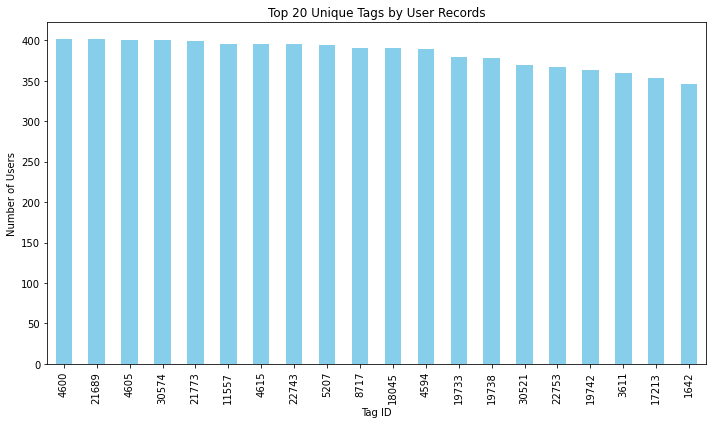

In [23]:
top_20_tags = df1.groupby('tag_id')['goodreads_book_id'].nunique().nlargest(20)
top_20_tags.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 20 Unique Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of Users')
plt.tight_layout()
#plt.grid(True)
plt.show()